In [3]:
import pandas as pd
import geopandas as gpd
import requests

In [11]:
url = "https://fixmystreet.brussels/api/incidents?startDate=2024-01-01&endDate=2024-03-21&page={page:}&size={size:}"

In [12]:
rep = requests.get(url.format(page=0, size=1))

In [16]:
n = rep.json()["page"]["totalElements"]
m = n // 5000 + 1

In [18]:
frames = []
for i in range(6):
    rep = requests.get(url.format(page=i, size=5000))
    frame = pd.json_normalize(rep.json()["_embedded"]["response"])
    frames.append(frame)

In [19]:
data = pd.concat(frames)

In [23]:
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(
        x=data["location.coordinates.x"],
        y=data["location.coordinates.y"]
    ),
    crs="EPSG:31370"
)

In [29]:
selection = gpd.read_file("GDM_planFederal_perimeter.shp")

In [31]:
sel = gdf.sjoin(selection)

In [33]:
sel.to_excel("selection.xlsx")

<AxesSubplot:>

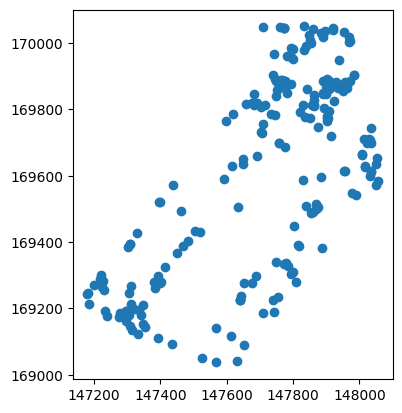

In [32]:
sel.plot()